# Obesity Level Prediction

## Data Dictionary 

**Demographic information about the respondents**
 - Gender : A person's gender
 - Age : The length of time that a person has lived
 - Height : The distance from the bottom of the feet to the top of the head in a human body
 - Weight : A person's mass or weight

**Historical Information**
- Family History with Overweight : Has a family member suffered or suffers from overweight?

**Eating Habits**
- CALC : Consumption of alcohol. Records Alcohol consumption 
- SCC : Calories consumption monitoring. Records Calories consumption 
- CH2O : abbrevation for Daily water consumption. Records the water drinking habit
- FAVC : Short form for Frequent consumption of high caloric food. Captures information on Caloric food consumption 
- FCVC : Short form for Frequency of consumption of vegetables. Records observations on Vegetable Consumption
- NCP : Short form for Number of main meals. Records observations on daily count of Main meal 
- CAEC : Short form for Consumption of food between meals. Records observations relating to food between meals 

**Physical Condition**
- MTRANS : transportation used
- TUE : Time using technology devices. Records the use of technological devices
- FAF : frequency of pyhsical activities
- SMOKE : Are you a smoker

## Hypothesis 

**Based on Demographics**
- Are Females more likely to be obessed than Males based on eating habits and physical conditions
- Are Males more likely to be obessed than Females based on eating habits and physical conditions
- Are older people more likely to be obessed than younger ones
- Does the weight and height of a person affect their likelihood to be obessed 
- Does obesity in family history increase obesity levels

## Descriptive Statistics 

In [1]:
# import obesity data using python pandas library
import pandas as pd
df = pd.read_csv('/Users/mac/Documents/USD/Applied-AI-Group-Projects/obesity.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

The dataset does not have null values 

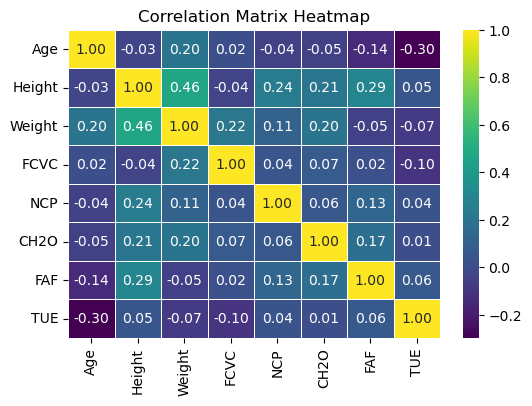

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap=plt.get_cmap('viridis'), fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()

This correlation matrix clearly reveals that there is no multicollinearity between weight and height

# Preprocessing Categorical Variables ( Feature Egineering)



To prepare the data for modelling, categorical features like 'Gender', 'family history with overweight', 'FAVC', 'CAEC', 'CALC', 'SMOKE', 'SCC', 'MTRANS' and target variable 'NObeyesdad' are encoded using label encoding to change them to numerical values. 

**Feature Encoding** : Before applying Linear models like logistic regression, data needs to be scaled to keep all features strictly numerical 

In [17]:
df['Gender']= df['Gender'].map({'Male':1, 'Female':0}).astype('int')
df['family_history_with_overweight']= df['family_history_with_overweight'].map({'yes':1, 'no':0}).astype('int')
df['FAVC']= df['FAVC'].map({'yes':1, 'no':0}).astype('int')
df['CAEC']= df['CAEC'].map({'Always':3, 'Frequently':2, 'Sometimes': 1, 'no':0}).astype('int')
df['CALC']= df['CALC'].map({'Always':3, 'Frequently':2, 'Sometimes': 1, 'no':0}).astype('int')
df['SMOKE']= df['SMOKE'].map({'yes':1, 'no':0}).astype('int')
df['SCC']= df['SCC'].map({'yes':1, 'no':0}).astype('int')
df['MTRANS']= df['MTRANS'].map({'Automobile':4, 'Motorbike':3, 'Bike':2, 'Public_Transportation': 1, 'Walking':0}).astype('int')
df['NObeyesdad']= df['NObeyesdad'].map({'Obesity_Type_III':6, 'Obesity_Type_II':5, 'Obesity_Type_I':4, 'Overweight_Level_II':3, 'Overweight_Level_I':2, 'Normal_Weight': 1, 'Insufficient_Weight':0}).astype('int')


In [28]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,3


### Feature Scaling for Independent variables 

This step in data Pre Processing is applied to independent variables or features of the data observations, to help normalize the data within a particular range of similar values. To ensure fair contribution of individual features in the obesity dataset we employ feature scaling to reduce bias towards features with larger values. Sometimes, it also helps in speeding up the calculations in an algorithm.

**Standard scalar** was used as our dataset has a normal distribution and standardscalar is best suited for normal distribution.

In [21]:
cols = ['Age','Height','Weight']

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
df[cols] = st.fit_transform(df[cols])

In [22]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,1
1,0,-0.522124,-1.947599,-1.168077,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,1
2,1,-0.206889,1.054029,-0.366090,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,1
3,1,0.423582,1.054029,0.015808,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2
4,1,-0.364507,0.839627,0.122740,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,3


### Split target (Dependent) variable from response variables (Independent)

In [24]:
X = df.drop('NObeyesdad', axis=1) # response variables
y = df['NObeyesdad'] # target vector variable y

# Obesity Level Prediction

The function below splits the dataset into train nad test, applies an ml model to predict target variable, calculates accuracy and cross validation score.

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, log_loss, roc_auc_score
import numpy as np 

# Dictionary to store model results
modeldf = {}

def model_val(model, X, y):
    """
    this function trains and evaluates a classification model.

    Parameters:
    model : This refers to the model to be trained and evaluated.
        sklearn estimator (e.g., LogisticRegression, SVC, etc.)
    X : array-like, shape (n_samples, n_features) 
        dataset Independent variables /  Feature matrix.
    y : array-like, shape (n_samples,)
        dataset dependent/predictor variable /Target labels.
    """
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) # stratify = y target variable to ensure even distribution of label 
    
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute accuracy score
    acc = accuracy_score(y_test, y_pred)

    # F1-Score (Weighted average) for handling class imbalance
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cross-validate the model
    scores = cross_val_score(model, X, y, cv=10)
    avg_cv_score = np.mean(scores)
    
   # Initialize logloss variable
    logloss = None

    # Log Loss (requires predicted probabilities) - optimized by ChatGPT 
    if hasattr(model, "predict_proba"):  # Ensure the model supports predict_proba 
        y_prob = model.predict_proba(X_test)
        logloss = log_loss(y_test, y_prob)

    # Print only the relevant output (modified with chatGPT)
    print(f"{model.__class__.__name__} Accuracy: {round(acc * 100, 2)}%")
    print(f"{model.__class__.__name__} Avg Cross-Validation Score: {round(avg_cv_score * 100, 2)}%")
    print(f"{model.__class__.__name__} F1-Score (Weighted): {round(f1 * 100, 2)}%")

    # Print log loss if available
    if logloss is not None:
        print(f"{model.__class__.__name__} Log Loss: {round(logloss, 2)}")
    else:
        print(f"{model.__class__.__name__} Log Loss: N/A (Model does not support predict_proba)")

    # Store results in the dictionary
    modeldf[type(model).__name__] = {
        "CV Score": round(avg_cv_score * 100, 2),
        "Accuracy Score": round(acc * 100, 2),
        "F1 Score": round(f1 * 100, 2),
        "Log Loss": round(logloss * 100, 2) if logloss is not None else 'N/A'
}

    # return y_pred


## Build Baseline Models

To make any prediction or build a model we must understand the type of classification required for the target dependent variables to be predicted. Our obesity dataset has labels for obesity levels encoded from 0-6 representing 7 levels of obesity ('Insufficient Weight', 'Normal Weight', 'Overweight Level I', 'Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III').We will require a type of classification where each record (person) belongs to only one obesity category at a time. This means that the model must choose one category out of the seven available classes in our target variable per prediction. Which is a case of multiple choice rather than a simple binary one. There are two approach to dealing with multiple values either as a multi class classifer or a multi label one. A very useful approach for this classification is a Multi-Class Classification; it ensures that each person can only have one obesity category at a time rather than a Multi label which requires that each record(person) can belong to multiple categories at the same time (i.e a person can be "Obessity type I" and "Normal weight" at the same time).

The Baseline model selected for this excercise is a special type of binary classification model (Logistic Regression) called One-vs-One classification model. Logistic Regression model is built for binary classification, but our obesity dataset is a classification task with more than two classes making default binary logistic regression models unsuitable for prediction task. The best way to utilise the logistic regression model for our dataset is to engage a heuristic method that can be used to split a multi-class classification problem into multiple binary classification datasets and train a binary classification model each. The two examples of this heauristic method include; One-vs-Rest (OvR) and One-vs-One (OvO). 

One-vs-One (OvO) splits a multi-class classification dataset into binary classification problems. Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into one dataset for each class versus every other class.

The Target variable to be predicted has labels ranging from 0-6 and one-vs-one will be best suited as it enables a split of one dataset for each class label. 



### Obesity Level Prediction using Logistic Regression 

Since our dataset target (Dependent) variable has 0-6 label represnting levels of obesity, we will use a OneVsOneClassifier (one-vs-one)logistic regression classification model as it is best suited for classification with such number of labels. 

how it works : the algorithm constructs one classifier per pair of classes. At prediction time, the class which received the most votes is selected. In the event of a tie (among two classes with an equal number of votes), it selects the class with the highest aggregate classification confidence by summing over the pair-wise classification confidence levels computed by the underlying binary classifiers

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

# Define and evaluate the model
model = OneVsOneClassifier(LogisticRegression(solver='liblinear'))
model_val(model, X, y)


OneVsOneClassifier Accuracy: 91.02%
OneVsOneClassifier Avg Cross-Validation Score: 92.09%
OneVsOneClassifier F1-Score (Weighted): 90.91%
OneVsOneClassifier Log Loss: N/A (Model does not support predict_proba)


In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Get decision function scores
y_score = model.decision_function(X_test)

# Plot ROC Curves
plt.figure(figsize=(7, 5))
for i in range(y_test_bin.shape[1]):  
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

# Format plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-One Logistic Regression ROC Curve')
plt.legend()
plt.show()

NameError: name 'y_test' is not defined

In [34]:

# Get probability scores for each class
y_score = model_val.predict_proba(X_test)

# Initialize variables for storing AUC scores
auc_scores = []

# Plot ROC Curves
plt.figure(figsize=(7, 5))
for i in range(y_test_bin.shape[1]):  
    # Compute False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    
    # Compute AUC for the current class
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    
    # Plot ROC Curve for each class
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Compute Mean AUC (Macro-Averaged AUC)
mean_auc = np.mean(auc_scores)

# Format the plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Multi-Class ROC Curve (Mean AUC = {mean_auc:.2f})')
plt.legend()
plt.show()

# Print individual AUC scores
print("AUC Scores for each class:", auc_scores)
print("Mean AUC Score:", mean_auc)

AttributeError: 'function' object has no attribute 'predict_proba'

##### Check Distribution of Target Class in Train and Test set

In [32]:
y_train.value_counts()/len(y_train)


NObeyesdad
4    0.166469
6    0.153436
5    0.140403
3    0.137441
2    0.137441
1    0.135664
0    0.129147
Name: count, dtype: float64

In [33]:
y_test.value_counts()/len(y_test)

NObeyesdad
4    0.165485
6    0.153664
5    0.141844
1    0.137116
3    0.137116
2    0.137116
0    0.127660
Name: count, dtype: float64

## Other Models 

### 1. Obesity Level Prediction using GradientBoosting Classifier 

Gradient boosting classifier is a Strong learner that combines weak classifiers for high accuracy and handles complex relationships well. Gradient boosting was selected as one of the algoritms to use on this dataset because the clasissifcation of obesisty levels is focused on eating habits and physical condition explanatory variables which are factors GBC captures better than linear models and learns effectively. 

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier Accuracy: 94.5626%
GradientBoostingClassifier Avg Cross-Validation Score: 96.0248%
GradientBoostingClassifier F1-Score (Weighted): 94.5546%
GradientBoostingClassifier Log Loss: 0.2026


### 2. Obesity Level Prediction using Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier Accuracy: 91.96%
DecisionTreeClassifier Avg Cross-Validation Score: 92.62%
DecisionTreeClassifier F1-Score (Weighted): 91.98%
DecisionTreeClassifier Log Loss: 2.9


### 3. Obesity Level Prediction using Random Forest Classifier
This model is good at reducing overfitting, provides feature importance, and handles non-linear relationships. For the obesity dataset, there are some non-linear relationships. Random Forest was thus selected to help manage this while predicting the levels of obesity.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                random_state=42, 
                                class_weight="balanced"
                                )
model_val(model,X,y)

RandomForestClassifier Accuracy: 93.85%
RandomForestClassifier Avg Cross-Validation Score: 93.95%
RandomForestClassifier F1-Score (Weighted): 93.92%
RandomForestClassifier Log Loss: 0.31


### 4. Obesity Level Prediction using XGB Classifier

XGBoost (Extreme Gradient Boosting) is also another excellent choice  model for obesity level classification (multi-class classification with target values 0-6). It's parameter enables efficient and effective multi-class classification. It builds on the concepts of Gradient Boosting but optimizes speed, performance, and generalization. 

- The **multi:softmax** objective uses a softmax function to calculate the probability of each class and selects the class with the highest probability as the prediction
- The num_class parameter helps capture the number of unique target label classes.
These parameters help adjust XGBoost to cater for multi class classification. 

In [20]:
from xgboost import XGBClassifier 

model = XGBClassifier(objective='multi:softmax',  # for multi-class classification
    num_class=7,  # Number of unique classes (0-6)
    eval_metric='mlogloss'
    )
model_val(model,X,y)

XGBClassifier Accuracy: 94.8%
XGBClassifier Avg Cross-Validation Score: 96.74%
XGBClassifier F1-Score (Weighted): 94.79%
XGBClassifier Log Loss: 0.16


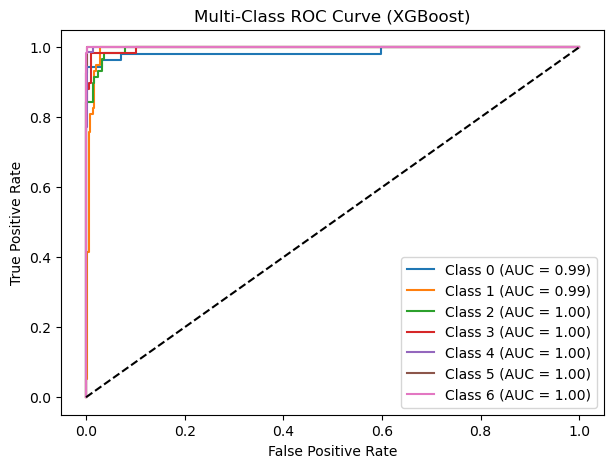

In [ ]:
# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Get probability scores (not decision function)
y_score = model.predict_proba(X_test)  # Use predict_proba instead of decision_function

# Plot ROC Curves
plt.figure(figsize=(7, 5))
for i in range(y_test_bin.shape[1]):  
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

# Format plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (XGBoost)')
plt.legend()
plt.show()


### 5. Obesity Level Prediction using Support Vector Machines

Since the obesity dataset is relatively small, the SVM algorithm was employed as it works well for small to medium-sized datasets by using the kernel trick for complex patterns. To adjust the binary approach of SVM we employ the heuristics advantage of One-vs-One classification approach in SVM. We do this by using the parameters within SVC that covers for multi class. An examole of this will be using decision_function_shape and equating it to OVO heuristic approach. 

In [57]:
from sklearn.svm import SVC

# define and evaluate the model
model = SVC(decision_function_shape='ovo',  # One-vs-One strategy for multi-class
        random_state=42)
model_val(model,X,y)


SVC Accuracy: 64.07%
SVC Avg Cross-Validation Score: 59.59%
SVC F1-Score (Weighted): 63.28%
SVC Log Loss: N/A (Model does not support predict_proba)


In [58]:
# Convert modeldf to a Pandas DataFrame
df_results = pd.DataFrame.from_dict(modeldf, orient='index').reset_index()
df_results.columns = ["Model", "CV Score", "Accuracy", "F1 Score", "Log Loss"]

# Display the results
print(df_results)

                    Model  CV Score  Accuracy  F1 Score Log Loss
0      OneVsOneClassifier     75.32     78.72     78.32      N/A
1           XGBClassifier     96.74     94.80     94.79    16.15
2                     SVC     59.59     64.07     63.28      N/A
3  DecisionTreeClassifier     92.62     91.96     91.98   289.71
4  RandomForestClassifier     94.80     94.80     94.85    25.84


In [59]:
# Sort the DataFrame by 'Accuracy' and then 'CV Score', both in descending order
df_results.sort_values(by=['Accuracy', 'CV Score'], ascending=[False, False]).reset_index(drop=True)


,Model,CV Score,Accuracy,F1 Score,Log Loss
0,XGBClassifier,96.74,94.80,94.79,16.15
1,RandomForestClassifier,94.80,94.80,94.85,25.84
2,DecisionTreeClassifier,92.62,91.96,91.98,289.71
3,OneVsOneClassifier,75.32,78.72,78.32,N/A
4,SVC,59.59,64.07,63.28,N/A


XGBClassifier model performed best when compared to other models in terms of accuracy, cross validation score, log loss and F1 score. 

- **CV Score** : A 10 fold cross validation score was used to validate the model on different part of the data for test and train of datasets experimentally. FOr a 10 fold cross validation, the dataset is split in such a way that it allows for learning and training from different portion of the dataset.

- **Accuracy** : It is the ratio of correct predicted values over total predicted values. 

- **F1 Score** : This evaluation metric is commonly used in classification tasks to evaluate the performance of a model. It combines precision and recall into a single value, providing a balanced measure of a model's precision and recall

## Model Hyperparameter Tuning - Using RandomizedSearchCV

The obesity dataset has 16 features as explanatory dependent variables as such, RandomizedSearchCV is an efficient method for tuning obesity dataset hyperparameters as there are many parameters to explore. The approach ensures that we do not have to search the entire parameter space exhaustively, but still manage to find optimal or near-optimal hyperparameters within the given number of iterations.

This helps optimize the prediction of the models by ytuning the parameters, such that if the evaluationn metric scores are improved the parameter values will be adopted for the model.

In [61]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# RandomForest

rf_grid = {'n_estimators': np.arange(10,1000,10),
'max_features':['auto', 'sqrt'],
'max_depth': [None,3,5,10,20,30],
'min_samples_split':[2,5,20,50,100],
'min_samples_leaf':[1,2,5,10]
}

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                                param_distributions=rf_grid,
                                n_iter=20,
                                cv=10,
                                verbose=True)

rs_rf.fit(X,y)

In [84]:
rs_rf.best_score_

0.9470423857641063

RandomForest had no significant change after tuning the hyperparameters 

In [ ]:
# Hyperparameter grid for XGBClassifier
xgb_grid = {
    'n_estimators': np.arange(50, 1001, 50),  # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Step size shrinking
    'max_depth': [3, 5, 7, 10, 12],  # Depth of trees
    'min_child_weight': [1, 3, 5, 7],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.5, 0.7, 0.8, 1.0],  # Fraction of samples used for each tree
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],  # Fraction of features used for each tree
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition
    'scale_pos_weight': [1, 2, 3]  # Balance of positive and negative weights (useful for imbalanced classes)
}

# RandomizedSearchCV for XGBClassifier
rs_xgb = RandomizedSearchCV(XGBClassifier(),
                            param_distributions=xgb_grid,
                            n_iter=20,  # Number of iterations for randomized search
                            cv=10,  # 10-fold cross-validation
                            verbose=True,  # Print progress
                            n_jobs=-1,  # Use all available processors
                            random_state=42)  # Ensure reproducibility

# Fit the model
rs_xgb.fit(X, y)




In [89]:
from pprint import pprint
# Display the best parameters and score
pprint(f"Best Parameters: {rs_xgb.best_params_}")
print(f"\nBest Cross-validation Score: {rs_xgb.best_score_}")

("Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': "
 "400, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': "
 "0.1, 'colsample_bytree': 1.0}")

Best Cross-validation Score: 0.9659371367253866


In [ ]:
# Hyperparameter grid for GradientBoostingClassifier
gbc_grid = {
    'n_estimators': np.arange(50, 1001, 50),  # Number of boosting tree rounds 
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Step size shrinking
    'max_depth': [3, 5, 7, 10, 12],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 20, 50],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum samples required at a leaf node
    'subsample': [0.5, 0.7, 0.8, 1.0],  # Fraction of samples used for each tree
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'loss': ['deviance', 'exponential']  # Loss function: 'deviance' for logistic, 'exponential' for AdaBoost-like
}

# RandomizedSearchCV for GradientBoostingClassifier
rs_gbc = RandomizedSearchCV(GradientBoostingClassifier(),
                            param_distributions=gbc_grid,
                            n_iter=20,  # Number of iterations for randomized search
                            cv=10,  # 10-fold cross-validation
                            verbose=True,  # Print progress
                            n_jobs=-1,  # Use all available processors
                            random_state=42)  # Ensure reproducibility

# Fit the model
rs_gbc.fit(X, y)

In [ ]:
# Display the best parameters and score
print(f"Best Parameters: {rs_gbc.best_params_}")
print(f"Best Cross-validation Score: {rs_gbc.best_score_}")

Tuning hyperparameters does not result to any significant change in the model evaluation outcomes

# References:

- Sklearn one-vs-one Logistice regression classification algoritm : https://scikit-learn.org/stable/modules/multiclass.html#ovo-classification
- Feature Scaling : https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/?ref=header_outind
- Logistic Regression for multi class : https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

